In [9]:
os.environ.keys()

KeysView(environ({'BENCH': '/home/matt/Documents/bench/', 'BLUEHIVE': 'mburns13@bluehive.circ.rochester.edu', 'CHROME_DESKTOP': 'code.desktop', 'COLORTERM': 'truecolor', 'CONDA_DEFAULT_ENV': 'viz', 'CONDA_EXE': '/home/matt/miniconda3/bin/conda', 'CONDA_PREFIX': '/home/matt/miniconda3/envs/viz', 'CONDA_PROMPT_MODIFIER': '(viz) ', 'CONDA_PYTHON_EXE': '/home/matt/miniconda3/bin/python', 'CONDA_SHLVL': '2', 'DATA': '/home/matt/Documents/data', 'DBUS_SESSION_BUS_ADDRESS': 'unix:path=/run/user/1000/bus', 'DEBUGINFOD_URLS': 'https://debuginfod.ubuntu.com ', 'DESKTOP_SESSION': 'ubuntu', 'DISPLAY': ':1', 'ELECTRON_NO_ATTACH_CONSOLE': '1', 'GDK_BACKEND': 'x11', 'GDMSESSION': 'ubuntu', 'GIO_LAUNCHED_DESKTOP_FILE': '/usr/share/applications/code.desktop', 'GIO_LAUNCHED_DESKTOP_FILE_PID': '63186', 'GJS_DEBUG_OUTPUT': 'stderr', 'GJS_DEBUG_TOPICS': 'JS ERROR;JS LOG', 'GNOME_DESKTOP_SESSION_ID': 'this-is-deprecated', 'GNOME_KEYRING_CONTROL': '/run/user/1000/keyring', 'GNOME_SHELL_SESSION_MODE': 'ubuntu

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import os
import sys
sys.path.insert(0, os.environ['PLOT_SETTINGS_DIR'])
import plot_settings
import matplotlib as mpl

mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif']= 'STIXGeneral'
mpl.rcParams['mathtext.fontset']= 'stix'
mpl.rcParams['font.size']= 28
import matplotlib.ticker as tk

[100]


/tmp/ipykernel_122012/1813068970.py:63: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['' for i in ax.get_yticks()])
/tmp/ipykernel_122012/1813068970.py:63: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['' for i in ax.get_yticks()])
/tmp/ipykernel_122012/1813068970.py:63: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['' for i in ax.get_yticks()])


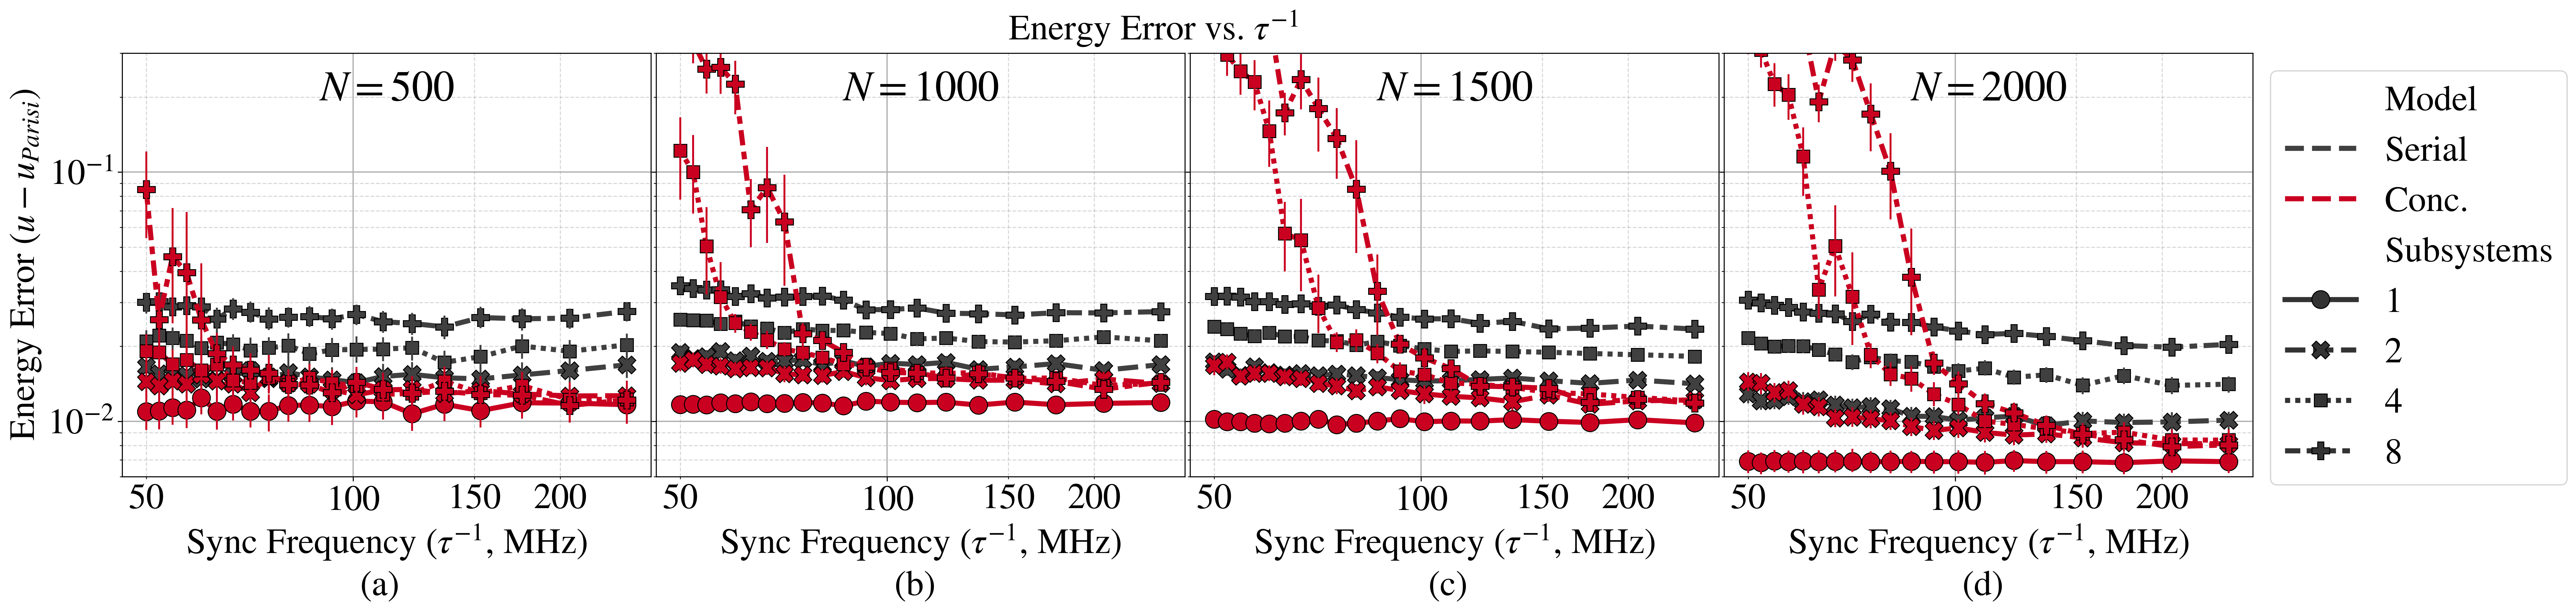

In [63]:
brim_df = pd.read_csv('../data/sk_full.csv').rename(columns={'blocks': 'Subsystems'})
brim_df['Model'] = brim_df['concurrent'].replace({True: 'Conc.', False: 'Serial'})
fig, axs = plt.subplots(ncols=4, figsize=(30,6),
                       gridspec_kw={'wspace':0.01})
palette = [ "#404040",
            # "#fdb863",
            # "#f4a582",
            "#ca0020"
            ]
axs = axs.T
ax = axs[0]
brim_df['Bandwidth'] = 1 / brim_df['tpart'] / 1e6
brim_df['error'] = brim_df['u'] - -0.7633
line_args = dict(
    y='error',
    x='Bandwidth',
    linestyle='--',
    # marker='X',
    markers=True,
    markersize=14,
    style='Subsystems',
    markeredgecolor='black',
    linewidth=4,
    hue='Model',
    err_style='bars',
    palette=palette
)
sns.lineplot(ax=ax,
             data=brim_df.query('nodes==500 and (Subsystems == 1 or Subsystems == 2 or Subsystems == 4 or Subsystems == 8)'), 
             **line_args
)
ax.legend()
ax = axs[1]
sns.lineplot(ax=ax,
             data=brim_df.query('nodes==1000 and (Subsystems == 1 or Subsystems == 2 or Subsystems == 4 or Subsystems == 8)'), 
             **line_args)
ax = axs[2]
sns.lineplot(ax=ax,
             data=brim_df.query('nodes==1500 and (Subsystems == 1 or Subsystems == 2 or Subsystems == 4 or Subsystems == 8)'), 
             **line_args)
ax = axs[3]
sns.lineplot(ax=ax,
             data=brim_df.query('nodes==2000 and (Subsystems == 1 or Subsystems == 2 or Subsystems == 4 or Subsystems == 8)'), 
             **line_args)
for ax, label in zip(axs, ['a', 'b', 'c', 'd']):
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_xticks([100], minor=False)
    # ax.set_xticks(np.arange(40, 220, 20), minor=True)
    ax.xaxis.set_major_locator(tk.FixedLocator([100]))
    ax.xaxis.set_minor_locator(tk.FixedLocator([50, 150, 200]))
    ax.xaxis.set_major_formatter(tk.ScalarFormatter())
    ax.xaxis.set_minor_formatter(tk.ScalarFormatter())
    # ax.set_xlim(np.arange(40, 220, 20))
    ax.set_xlabel('Sync Frequency ($\\tau^{-1}$, MHz)')
    ax.set_ylim(6e-3, 3e-1)
    ax.grid(which='minor', linestyle='--', alpha=0.5)
    ax.grid(which='major', linewidth=1)
    ax.annotate(text=f"({label})", xy=(0.45, -0.28), xycoords='axes fraction', fontsize=28)
print(axs[0].get_xticks())
for ax in axs[1:]:
    ax.set_ylabel('')
    ax.set_yticklabels(['' for i in ax.get_yticks()])
for ax in axs[0:-1]:
    ax.legend_ = None
axs[0].set_ylabel('Energy Error ($u - u_{Parisi}$)')
axs[0].set_title('$N=500$', y=0.87)
axs[1].set_title('$N=1000$', y=0.87)
axs[2].set_title('$N=1500$', y=0.87)
axs[3].set_title('$N=2000$', y=0.87)
fig.suptitle('Energy Error vs. $\\tau^{-1}$', fontsize=28, y=0.96)
axs[-1].legend(bbox_to_anchor=(1,1), loc='upper left')
fig.savefig('../figures/sk_comparison.pdf', bbox_inches='tight', dpi=300)
plt.show()

In [72]:
df2['tstop']

600      0.00002
601      0.00002
602      0.00002
603      0.00002
604      0.00002
          ...   
45191    0.00002
45192    0.00002
45193    0.00002
45194    0.00002
45195    0.00002
Name: tstop, Length: 23596, dtype: float64

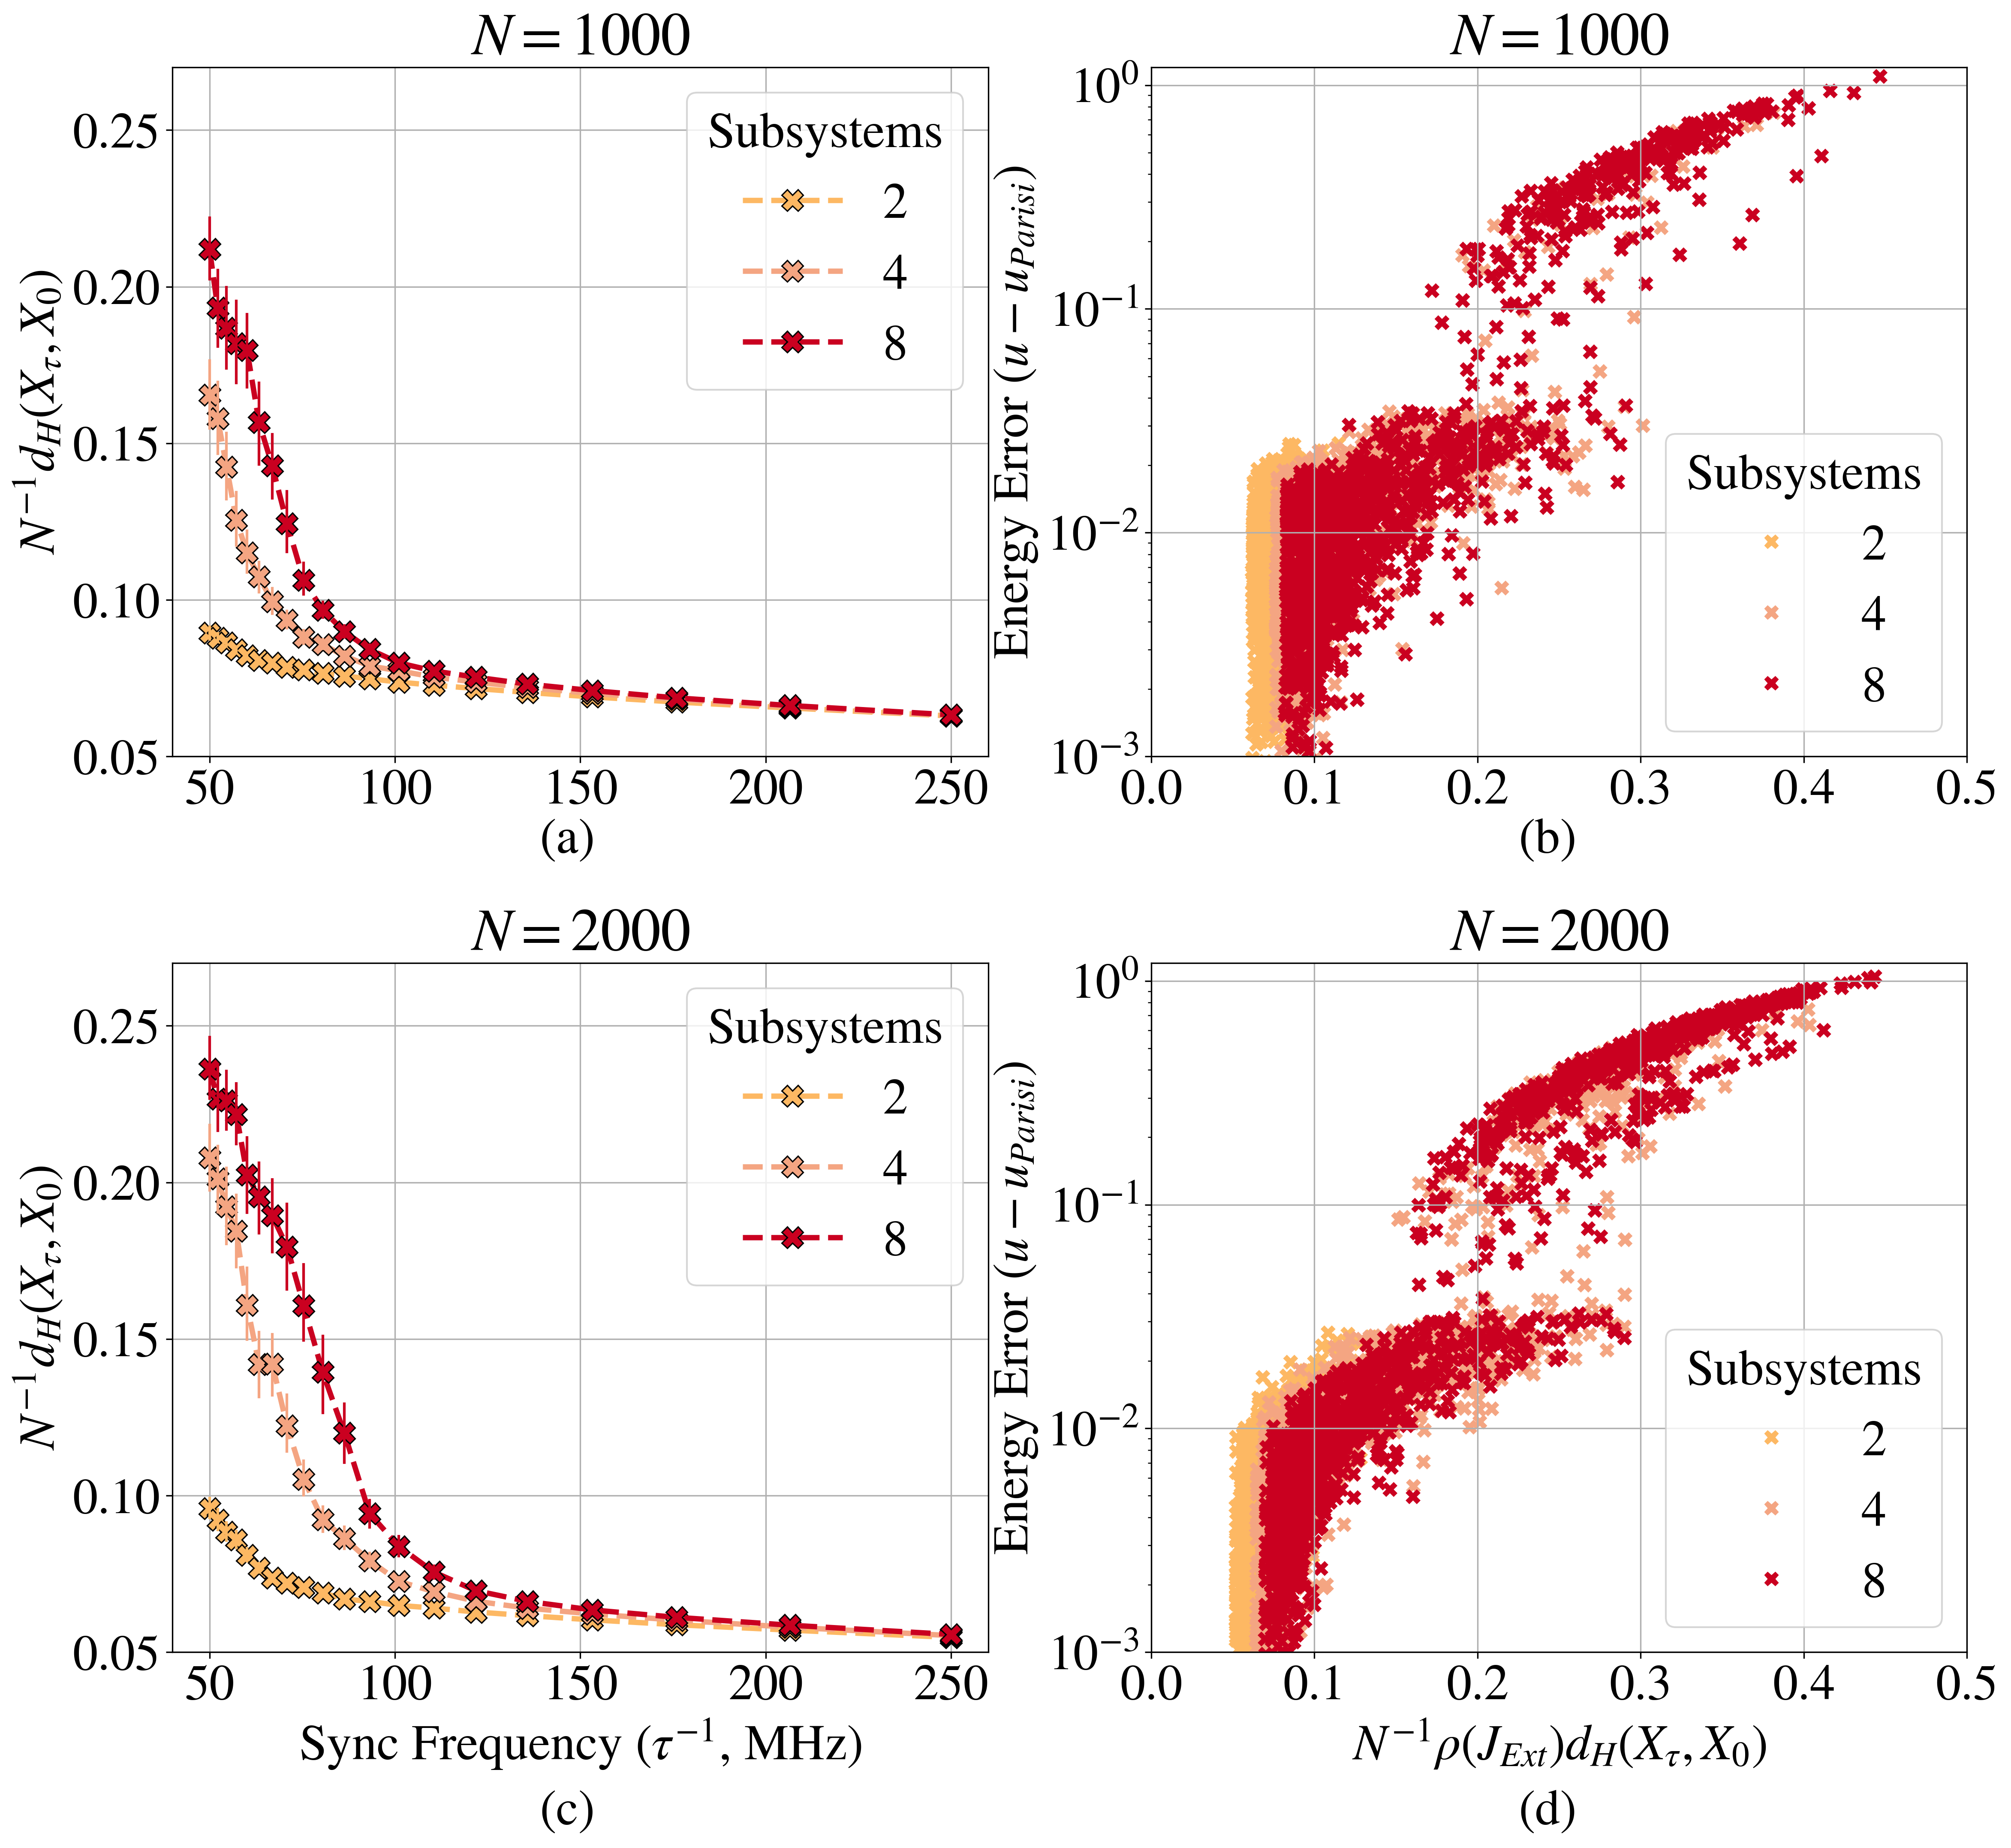

In [79]:
df2 = pd.read_csv('../data/sk_full.csv').rename(columns={'blocks': 'Subsystems'}).query('concurrent')

df2['scaled_hamming'] = df2['Average Hamming Distance (Normalized)'] * df2['JExtMax']
palette = [ "#404040",
#             "#fdb863",
            "#f4a582",
            "#ca0020",]
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(18,16),
                       gridspec_kw={'hspace':0.3})
axs = axs.T
palette = [ 
#     "#404040",
            "#fdb863",
            "#f4a582",
            "#ca0020",]
line_args = dict(
    linestyle='--',
    marker='X',
    markersize=12,
    markeredgecolor='black',
    linewidth=3,
    hue='Subsystems',
    err_style='bars',
    palette=palette
)

df2['Bandwidth'] = 1 / df2['tpart'] / 1e6

ax = axs[0][0]
sns.lineplot(ax=ax,
             data=df2.query('concurrent and nodes==1000 and (Subsystems == 2 or Subsystems == 4 or Subsystems == 8)'), 
             x='Bandwidth', 
                y='Average Hamming Distance (Normalized)', **line_args)
ax = axs[0][1]
sns.lineplot(ax=ax,
             data=df2.query('concurrent and nodes==2000 and Subsystems != 1'), 
             x='Bandwidth', 
                y='Average Hamming Distance (Normalized)', **line_args)

ax = axs[1][0]
sns.scatterplot(ax=ax,
             data=df2.query('concurrent and nodes==1000 and Subsystems != 1'), 
             x='scaled_hamming', 
                y='error', 
             hue='Subsystems',
#              hue='Subsystems', 
#                 style='nodes', 
             edgecolor='none',
                marker='X',
                s=70,
             palette=palette
           )
ax = axs[1][1]
sns.scatterplot(ax=ax,
             data=df2.query('concurrent and nodes==2000 and Subsystems != 1'), 
             x='scaled_hamming', 
                y='error', 
             hue='Subsystems',
#              hue='Subsystems', 
#                 style='nodes', 
             edgecolor='none',
                marker='X',
                s=70,
             palette=palette
           )
# sns.jointplot(ax=ax,
#              data=df2.query('concurrent and nodes==2000 and Subsystems != 1'), 
#              x='scaled_hamming', 
#                 y='error', 
#              hue='Subsystems',
# #              hue='Subsystems', 
# #                 style='nodes', 
#             #  edgecolor='none',
#                 # marker='X',
#                 # s=70,
#              palette=palette
#            )
for ax in axs[1]:
    ax.set_xlim(0, 0.5)
    
    ax.set_xlabel('$N^{-1}\\rho(J_{Ext})d_H(X_\\tau,X_0)$')
    ax.grid()
    ax.set_ylim(1e-3, 1.2)
    ax.set_yscale('log')
    ax.set_ylabel('Energy Error ($u - u_{Parisi}$)')
for ax in axs[0]:
#     ax.set_xlim(0.05, .35)
#     ax.axhline(-0.7633)
    ax.grid()
    ax.set_ylabel('$N^{-1}d_H(X_\\tau, X_0)$')
    ax.set_ylim(0.05, .27)
    ax.set_xlabel('Sync Frequency ($\\tau^{-1}$, MHz)')
for ax in axs[0][:-1]:
    ax.set_xlabel('')
for ax in axs[1][:-1]:
    ax.set_xlabel('')
for ax, label in zip(axs.T[0], ['a', 'b']):
    ax.annotate(text=f"({label})", xy=(0.45, -0.14), xycoords='axes fraction', fontsize=28)
for ax, label in zip(axs.T[1], ['c', 'd']):
    ax.annotate(text=f"({label})", xy=(0.45, -0.25), xycoords='axes fraction', fontsize=28)
axs[0][0].set_title('$N=1000$')
axs[0][1].set_title('$N=2000$')
axs[1][0].set_title('$N=1000$')
axs[1][1].set_title('$N=2000$')
fig.savefig('../figures/concurrent_hamming_scaling.pdf', bbox_inches='tight', dpi=300)
plt.show()

In [70]:
df2['Bandwidth']

600      250.0
601      250.0
602      250.0
603      250.0
604      250.0
         ...  
45191     50.0
45192     50.0
45193     50.0
45194     50.0
45195     50.0
Name: Bandwidth, Length: 23596, dtype: float64

In [ ]:
brim_df = pd.read_csv('../data/sk_conc_eig.csv').rename(columns={'Subsystems': 'Subsystems'})
palette = [ "#404040",
#             "#fdb863",
            "#f4a582",
            "#ca0020",]
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(28,18),
                       gridspec_kw={'hspace':0.1})
# axs = axs.T
line_args = dict(
    linestyle='--',
    marker='X',
    markersize=12,
    linewidth=3,
    hue='Subsystems',
    err_style='bars',
    palette=palette
)
ax = axs[0][0]
sns.lineplot(ax=ax,
             data=brim_df.query('concurrent and nodes==500 and Subsystems != 1'), 
             x='tpart', 
                y='Average Hamming Distance (Normalized)', 
             **line_args
)
ax = axs[0][1]
sns.lineplot(ax=ax,
             data=brim_df.query('concurrent and nodes==1000 and (Subsystems == 2 or Subsystems == 4 or Subsystems == 8)'), 
             x='tpart', 
                y='Average Hamming Distance (Normalized)',  
             **line_args)
ax = axs[0][2]
sns.lineplot(ax=ax,
             data=brim_df.query('concurrent and nodes==1500 and Subsystems != 1'), 
             x='tpart', 
                y='Average Hamming Distance (Normalized)',  
             **line_args)
ax = axs[0][3]
sns.lineplot(ax=ax,
             data=brim_df.query('concurrent and nodes==2000 and Subsystems != 1'), 
             x='tpart', 
                y='Average Hamming Distance (Normalized)',  
             **line_args)
ax = axs[1][0]
sns.scatterplot(ax=ax,
             data=brim_df.query('concurrent and nodes==500 and Subsystems != 1'), 
             x='Average Hamming Distance (Normalized)', 
                y='u', 
             hue='Subsystems',  
             edgecolor='black',
                marker='X',
                s=70,
#                 style='nodes',
             palette=palette)
ax = axs[1][1]
sns.scatterplot(ax=ax,
             data=brim_df.query('concurrent and nodes==1000 and (Subsystems == 2 or Subsystems == 4 or Subsystems == 8)'), 
             x='Average Hamming Distance (Normalized)', 
                y='u', 
             hue='Subsystems', 
#                 style='nodes',  
             edgecolor='black',
                marker='X',
                s=70,
             palette=palette)
ax = axs[1][2]
sns.scatterplot(ax=ax,
             data=brim_df.query('concurrent and nodes==1500 and Subsystems != 1'), 
             x='Average Hamming Distance (Normalized)', 
                y='u', 
             hue='Subsystems', 
#                 style='nodes', 
             edgecolor='black',
                marker='X',
                s=70,
             palette=palette)
ax = axs[1][3]
sns.scatterplot(ax=ax,
             data=brim_df.query('concurrent and nodes==2000 and Subsystems != 1'), 
             x='Average Hamming Distance (Normalized)', 
                y='u', 
             hue='Subsystems', 
#                 style='nodes', 
             edgecolor='black',
                marker='X',
                s=70,
             palette=palette)
for ax in axs[1]:
    ax.set_xlim(0.05, .35)
    ax.axhline(-0.7633)
    ax.grid()
    ax.set_ylim(-.8, .4)
for ax in axs[0]:
#     ax.set_xlim(0.05, .35)
#     ax.axhline(-0.7633)
    ax.grid()
    ax.set_ylim(0.05, .3)
    ax.set_xlabel('$\\tau$ (s)')
for ax in axs[0][1:]:
    ax.set_ylabel('')
    ax.set_yticklabels(['' for _ in ax.get_xticks()])
for ax in axs[1][1:]:
    ax.set_ylabel('')
    ax.set_yticklabels(['' for _ in ax.get_xticks()])
# ax.set_xscale('log')
# ax.set_yscale('log')
plt.show()